# Credit Card Fraud Detection Using Logistic Regression and Support Vector Machines (SVM)

#### Fraud detection is a critical challenge in financial transactions, where identifying fraudulent activities accurately can prevent significant financial losses. This project explores the application of Logistic Regression and Support Vector Machines (SVM) with different kernel functions to classify transactions as normal or fraudulent. 

#### The goal is to compare the performance of the different models and determine the most effective approach for fraud detection.

# Dataset Description
#### The dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

#### It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data are not provided. 

#### Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

#### Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

#### The feature 'Amount' is the transaction amount.

#### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Import necessary packages

In [3]:
# Import our regular old heroes 

import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficiency. 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import dataset and view the first 10 rows

df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Dataset Exploration

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Check for null values
np.array(df.isna().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

##### There is no missing data in the dataset

#### Let's do a quick analysis of the distribution of observations across our target variable (Class).

In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### There are 492 frauds and 284,315 normal transactions out of 284,807 transactions.

In [12]:
not_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [14]:
# Percentage of non-fraud transactions in the dataset 
len(not_fraud)/(len(df))

0.9982725143693799

#### Visualise the class distribution

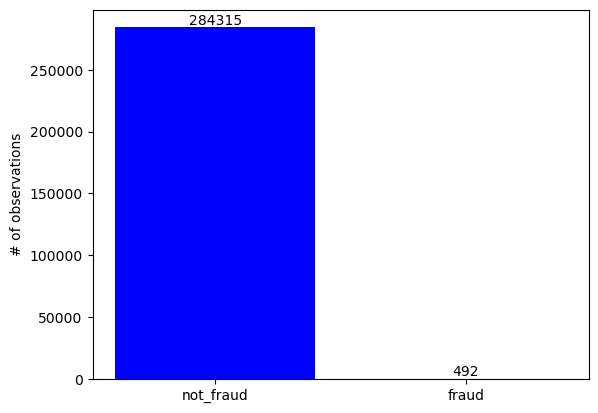

In [168]:
# Visualise the class distribution
labels = df['Class'].unique()
heights = [len(not_fraud), len(fraud)]

fig, ax = plt.subplots()
bars = ax.bar(labels, heights, color='grey')
# Add labels on top of the bars
ax.bar_label(bars, fmt='%d')

plt.bar(labels, heights, color = 'blue')
plt.xticks(labels,['not_fraud', 'fraud'])
plt.ylabel('# of observations')
plt.show()

#### As you can see, the dataset is highly imbalanced. The positive class (1), which are the fraudulent transactions, is way lesser than the negative class (0), which are the normal transactions.

#### To put this in perspective as to why this is such an issue, say we had a model that always predicts that a given transaction is not fraud (clearly a really bad model). Such a model would achieve an accuracy of 99.8%. This is why class imbalance can be a serious problem if left unchecked.

#### To prevent overfitting on the majority class (not_fraud), we'll use a resampling technique to balance the dataset.

#### We will do this by establishing a class size and then upsampling the minority class and downsampling the majority class to the predetermined class size.  A good heuristic to use is to set the class size to be half the size of the majority class.

In [16]:

from sklearn.utils import resample

# Upsample minority to half the size of majority class
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= int(len(not_fraud)/2), # class size set to be half the size of the majority class
                          random_state=27) # reproducible results

# Downsample majority class to half the size of the majority class
not_fraud_downsampled= resample(not_fraud,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples= int(len(not_fraud)/2), # class size set to be half the size of the majority class
                          random_state=27) # reproducible results

# Combine upsampled minority class with downsampled majority class
df_resampled= pd.concat([fraud_upsampled, not_fraud_downsampled])

# Check new class counts
df_resampled['Class'].value_counts()


Class
1    142157
0    142157
Name: count, dtype: int64

## Split the dataset into Training and Testing sets

In [ ]:
X = df_resampled.drop(columns = ['Class'])
y = df_resampled['Class']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

# Fitting the Models

 ### 1/ Fitting a logistic regression model:

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Standardise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
# create an instance
lr = LogisticRegression()

# train the data
lr.fit(X_train_scaled, y_train)


LogisticRegression()

In [124]:
# Make predictions on the testing dataset
lr_pred = lr.predict(X_test_scaled)

### We'll quickly test it out to see some result.
### Let's see some actual fraudulent transactions and how the logistic regression model predicted them:

In [196]:
#`y_test` contains actual values and `lr_pred` contains predicted values for the logistic regression model
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})
results_df.index.name = "Transactions"


# Filter only fraudulent transactions (fraud is labeled as 1)
fraud_predictions = results_df[results_df['Actual'] == 1]

# Display first few rows
print(fraud_predictions.head(10))

              Actual  Predicted
Transactions                   
154234             1          1
154960             1          1
248971             1          1
154960             1          1
93486              1          1
6427               1          1
150601             1          1
154234             1          1
219025             1          0
153885             1          1


### Let's see where the model made mistakes:

In [198]:
misclassified = results_df[results_df['Actual'] != results_df['Predicted']]
print(misclassified.head(10))


              Actual  Predicted
Transactions                   
219025             1          0
100623             1          0
199166             0          1
275992             1          0
100623             1          0
42624              0          1
131272             1          0
56703              1          0
58761              1          0
10498              1          0


# Checking model accuracy
#### In this project, i focus on the Recall score and the Precision score to check the accuracy of the model.

#### Precision Score: When the model predicts that a transaction is fraud, how often is it correct? Calculated as True positive/total predicted positives.

#### Recall Score: When the actual outcome of a transaction is fraud, how often do we predict it as such? Calculated as True positive/ Total actual negatives. 

#### A high recall score means fewer false negatives while a precision score means fewer false positives.

#### We want to achieve a high recall score for good fraud detection and also a high precision score to prevent flagging normal transactions as fraud.

In [171]:
# Model Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy score
accuracy = accuracy_score(y_test, lr_pred)
print(f'Model accuracy score: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)
labels = ['0: Normal', '1: Fraud']
conf_data = pd.DataFrame(data = conf_matrix, index = labels, columns = labels)
print(f"\n Confusion matrix: \n {conf_data}\n")

# Generate classification report
class_report = classification_report(y_test, lr_pred, target_names=['0: Normal', '1: Fraud'])
print(f'\n Classification report: \n {class_report}\n')

Model accuracy score: 0.9492991927967219

 Confusion matrix: 
            0: Normal  1: Fraud
0: Normal      27776       671
1: Fraud        2212     26204


 Classification report: 
               precision    recall  f1-score   support

   0: Normal       0.93      0.98      0.95     28447
    1: Fraud       0.98      0.92      0.95     28416

    accuracy                           0.95     56863
   macro avg       0.95      0.95      0.95     56863
weighted avg       0.95      0.95      0.95     56863




#### Interpretation

***Recall Score: 92% --> 92% of actual fraud transactions were correctly detected.***

***Precision Score: 98% --> 98% of transactions that were flagged by the model as fraudulent are actually fraud.***

## 2/ Fitting a Support vector machine model with Linear decision boundary


In [72]:
from sklearn.svm import SVC

In [ ]:
# Fit a support vector machine classifier with a linear decision boundary

svm = SVC(kernel='linear')

svm.fit(X_train_scaled, y_train)

In [57]:
# Model Accuracy

svm_pred = svm.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, svm_pred)
print(f'Model accuracy score: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)
labels = ['0: Normal', '1: Fraud']
conf_data = pd.DataFrame(data = conf_matrix, index = labels, columns = labels)
print(f"\n Confusion matrix: \n {conf_data}\n")

# Generate classification report
class_report = classification_report(y_test, svm_pred, target_names=['0: Normal', '1: Fraud'])
print(f'\n Classification report: \n {class_report}\n')

Model accuracy score: 0.9514798726764329

 Confusion matrix: 
            0: Normal  1: Fraud
0: Normal      27792       655
1: Fraud        2104     26312


 Classification report: 
               precision    recall  f1-score   support

   0: Normal       0.93      0.98      0.95     28447
    1: Fraud       0.98      0.93      0.95     28416

    accuracy                           0.95     56863
   macro avg       0.95      0.95      0.95     56863
weighted avg       0.95      0.95      0.95     56863




#### Interpretation

***Recall Score: 93% --> 93% of actual fraud transactions were correctly detected by the model.***

***Precision Score: 98% --> 98% of transactions that were flagged by the model as fraudulent are actually fraud.***

## 3/ SVM (Rbf kernel)

#### Now we'll tune the svm model by changing a parameter. we'll use radial basis function (rbf) kernel, which allows to fit a non-linear decision boundary.  It is a more flexible model that captures complex patterns.

In [44]:
svm = SVC(kernel='rbf')

svm.fit(X_train_scaled, y_train)

# Model Accuracy

svm_pred = svm.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, svm_pred)
print(f'Model accuracy score: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)
labels = ['0: Normal', '1: Fraud']
conf_data = pd.DataFrame(data = conf_matrix, index = labels, columns = labels)
print(f"\n Confusion matrix: \n {conf_data}\n")

# Generate classification report
class_report = classification_report(y_test, svm_pred, target_names=['0: Normal', '1: Fraud'])
print(f'\n Classification report: \n {class_report}\n')

Model accuracy score: 0.9887624641682641

 Confusion matrix: 
            0: Normal  1: Fraud
0: Normal      28194       253
1: Fraud         386     28030


 Classification report: 
               precision    recall  f1-score   support

   0: Normal       0.99      0.99      0.99     28447
    1: Fraud       0.99      0.99      0.99     28416

    accuracy                           0.99     56863
   macro avg       0.99      0.99      0.99     56863
weighted avg       0.99      0.99      0.99     56863




### Interpretation

***Recall Score: 99% --> 99% of actual fraud transactions were correctly detected by the model.***

***Precision Score: 99% --> 99% of transactions that were flagged by the model as fraudulent are actually fraud.***

### Let's see some actual fraudulent transactions and how the model predicted them:

In [200]:
#`y_test` contains actual values and `svm_pred` contains predicted values for the SVM (RBF) model
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': svm_pred})
results_df.index.name = "Transactions"


# Filter only fraudulent transactions (fraud is labeled as 1)
fraud_predictions = results_df[results_df['Actual'] == 1]

# Display first few rows
print(fraud_predictions.head(10))


              Actual  Predicted
Transactions                   
154234             1          1
154960             1          1
248971             1          1
154960             1          1
93486              1          1
6427               1          1
150601             1          1
154234             1          1
219025             1          0
153885             1          1


### Let's see where the model made mistakes:

In [202]:
misclassified = results_df[results_df['Actual'] != results_df['Predicted']]
print(misclassified.head(10))


              Actual  Predicted
Transactions                   
219025             1          0
56703              1          0
101363             0          1
150491             0          1
65533              0          1
218006             0          1
27362              1          0
27362              1          0
68633              1          0
154701             0          1


# Model comparison

#### We'll compare the performance metrics for the three models: the logistic regression model, SVM using linear kernel and SVM using rbf kernel


The performance of the models is summarized in the table below:

                 Model  Precision  Recall  F1-score  Accuracy
0  Logistic Regression       0.98    0.92      0.95      0.95
1         SVM (Linear)       0.98    0.93      0.95      0.95
2            SVM (RBF)       0.99    0.99      0.99      0.99


<Figure size 800x500 with 0 Axes>

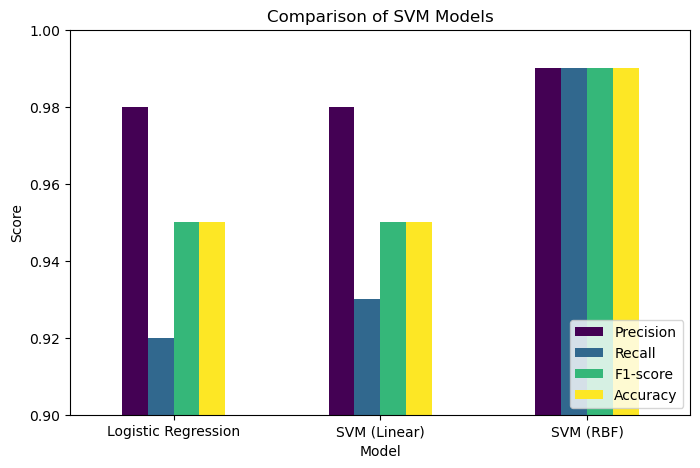

In [60]:
import matplotlib.pyplot as plt
# Performance metrics for the three models
metrics = {
    "Model": ["Logistic Regression", "SVM (Linear)", "SVM (RBF)"],
    "Precision": [0.98, 0.98, 0.99], 
    "Recall": [0.92, 0.93, 0.99], 
    "F1-score": [0.95, 0.95, 0.99], 
    "Accuracy": [0.95, 0.95, 0.99]  
}
# Convert to DataFrame and display the table
df_metrics = pd.DataFrame(metrics)
# Display the table
print("\nThe performance of the models is summarized in the table below:\n")
print(df_metrics)

plt.figure(figsize=(8, 5))
df_metrics.set_index("Model").plot(kind="bar", figsize=(8, 5), colormap="viridis")
plt.title("Comparison of SVM Models")
plt.ylabel("Score")
plt.ylim(0.9, 1.0) 
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

#### The SVM model with RBF kernel outperformed the other models, achieving 99% precision, recall, and accuracy. This indicates that it is highly effective in distinguishing fraudulent transactions from normal ones.

#### The linear SVM and logistic regression models performed well but were slightly less effective in detecting fraudulent transactions compared to SVM with RBF kernel

## CONCLUSION

### This project demonstrates the power of Support Vector Machines in fraud detection, particularly when using non-linear kernels like RBF. The results show that advanced classification models can significantly improve fraud detection accuracy, reducing financial risks.